<a href="https://colab.research.google.com/github/tyro2001/hello-world/blob/master/ML1_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

**Problem 1**

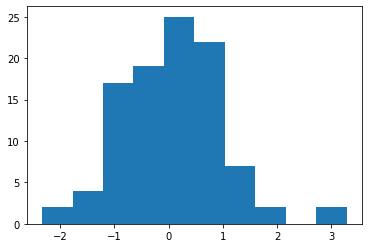

Frac inside CI: 0.95


In [2]:
def part_a():
    num_ps = 100
    num_obs = 100
    Y = ss.norm.rvs(size=[num_obs, num_ps])
    y_1 = Y[:,1]
    plt.hist(y_1)
    plt.show()
    l = y_1 - 1.96
    u = y_1 + 1.96
    print("Frac inside CI:", np.sum((l < 0) & (0 < u) ) / num_obs)

part_a()

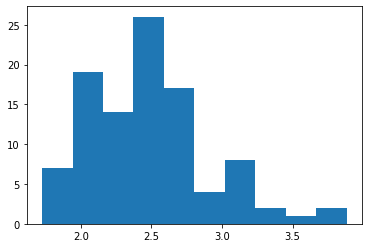

Frac inside CI: 0.11


In [3]:
def part_b():
    num_ps = 100
    num_obs = 100
    Y = ss.norm.rvs(size=[num_obs, num_ps])
    y_max = np.max(Y, axis = 1)
    plt.hist(y_max)
    plt.show()
    l = y_max - 1.96
    u = y_max + 1.96
    print("Frac inside CI:", np.sum((l < 0) & (0 < u) ) / num_obs)

part_b()

**Problem 2**

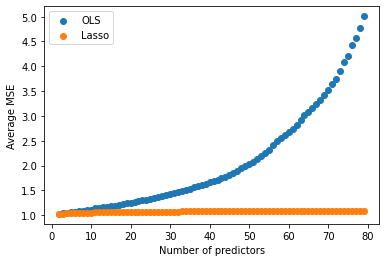

In [11]:
import math
import statsmodels.api as sm
import sklearn.linear_model as sklm

MAX_P = 80
NUM_ITERS = 100
NUM_POINTS = 100

true_beta1 = 4.0  ## X_1

ols_mse_sums = np.zeros(MAX_P)
las_mse_sums = np.zeros(MAX_P)
for i in range(NUM_ITERS):
    train_epsilon = ss.norm.rvs(size=NUM_POINTS)
    test_epsilon = ss.norm.rvs(size=NUM_POINTS)
    train_data = ss.norm.rvs(size = [NUM_POINTS, MAX_P])
    test_data  = ss.norm.rvs(size = [NUM_POINTS, MAX_P])
    train_y = true_beta1 * train_data[:,1]+ train_epsilon
    test_y  = true_beta1 * test_data[:,1] + test_epsilon

    for n in range(2, MAX_P):
        ols_train_data = sm.add_constant(train_data[:,0:n])
        ols_test_data = sm.add_constant(test_data[:,0:n])
        ols_mod = sm.OLS(train_y, ols_train_data)
        ols_res = ols_mod.fit()
        ols_test_y_hat = ols_test_data @ ols_res.params
        ols_mse = np.mean(np.power(test_y - ols_test_y_hat, 2))
        ols_mse_sums[n] += ols_mse

        lam = math.sqrt(math.log(n)/(50*NUM_POINTS))
        las_mod = sklm.Lasso(alpha=lam, normalize=True, fit_intercept=True)
        las_mod.fit(train_data[:,0:n], train_y)
        las_test_y_hat = las_mod.predict(test_data[:,0:n])
        las_mse = np.mean(np.power(test_y - las_test_y_hat, 2))
        las_mse_sums[n] += las_mse

ols_mse_avg = ols_mse_sums / NUM_ITERS
las_mse_avg = las_mse_sums / NUM_ITERS
plt.scatter(range(2, MAX_P), ols_mse_avg[2:], label="OLS")
plt.scatter(range(2, MAX_P), las_mse_avg[2:], label="Lasso")
plt.xlabel('Number of predictors')
plt.ylabel('Average MSE')
plt.legend(loc='upper left')
plt.show()


Commentary:  As expected, Lasso's "variable selection" property kept the error from exploding and, as a result, is a much better method than OLS for this problem. 

**Problem 3**

Part (a)

We can rewrite $||y-X\beta||_2^2$ as:

$\sum_{i=1}^n (y_i - X_i\beta)^2$

since $\tilde{y}_i = y_i$ and $\tilde{X}_i = X_i$ for $i=1,2,...n$, we can rewrite the above equation as:

$\sum_{i=1}^n (\tilde{y}_i - \tilde{X}_i\beta)^2$

similarly we can rewrite $\lambda ||\beta||_2^2$ as:

$\sum_{i=1}^p (\sqrt{\lambda}\beta_i)^2$

since $\tilde{y}_i = 0$ for $i>n$, we have:

$\sum_{i=1}^p (\tilde{y}_{n+i} - \sqrt{\lambda}\beta_i)^2$

since $\tilde{X}_{n+i}\beta = \sqrt{\lambda}\beta_i$ we have:

$\sum_{i=1}^p (\tilde{y}_{n+i} - \tilde{X}_{n+i}\beta)^2$

now combine the two sums for:

$\sum_{i=1}^{n+p} (\tilde{y}_i - \tilde{X}_i\beta)^2$

and we have:

$$\widehat{\beta}^{ridge} = \arg\min_{\beta \in \mathbb{R}^p} \sum_{i=1}^{n+p} (\tilde{y}_i - \tilde{X}_i\beta)^2$$

which is precisely what OLS provides when using $\tilde{Y}$ and $\tilde{X}$.

part (b)

Since the columns of $\sqrt{\lambda}I$ are linearly indpendent so are the columns of $\tilde{X}$.  Put another way the rank of $\tilde{X}$ will always be $p$ beause the rank of $\sqrt{\lambda}I$ is $p$.

part (c)

Using part (a) we have:

$\beta = (\tilde{X}^T \tilde{X})^{-1} \tilde{X}^T \tilde{Y}$

$ \tilde{X} = \begin{bmatrix} X \\ \sqrt{\lambda}I \end{bmatrix}$

$ \tilde{X}^T = \begin{bmatrix} X^T && \sqrt{\lambda}I \end{bmatrix}$

$ \tilde{X}^T \tilde{X} = (X^TX + \lambda I)$

$ \tilde{Y} = \begin{bmatrix} Y \\ 0 \end{bmatrix}$

$ \tilde{X}^T \tilde{Y} = (X^T Y + \lambda I 0) = X^TY$

Putting the two parts together we get:

$$\beta = (X^TX + \lambda I)^{-1} X^TY$$

**Problem 4**

Some facts from the problem:

1. $X = UDV^T$

2. $X^T = VDU^T$

3. $U^TU = V^TV = VV^T = I$

4. $(VDV^T)^{-1} = VD^{-1}V^T$

5. $(AB)^{-1} = B^{-1}A^{-1}$ for invertible matrices A and B of the proper shape

Part (a)

$\widehat{Y} = X(X^TX)^{-1}X^TY$

using (1) and (2) we have:

$UDV^T(VDU^T UDV^T)^{-1} VDU^T Y$

Removing $U^TU$:

$UDV^T(VDDV^T)^{-1} VDU^T Y$

Rewrite the inverse using (4):

$UDV^T VD^{-1}D^{-1}V^T VDU^T Y$

Remove $V^TV$:

$UDD^{-1}D^{-1}DU^T Y$

Cancel the terms with D:

$UU^T Y$

Part (b)

$\widehat{Y}_{ridge} = X(X^TX + \lambda I)^{-1} X^TY$

using (1) and (2) we have:

$UDV^T(VDU^T UDV^T +\lambda I)^{-1} VDU^T Y$

Remove $U^TU$:

$UDV^T(VDDV^T +\lambda I)^{-1} VDU^T Y$

Replace $I$ with $VV^T$:

$UDV^T(VDDV^T +\lambda VV^T)^{-1} VDU^T Y$

Factor $V^T$:

$UDV^T((VDD +\lambda V)V^T)^{-1} VDU^T Y$

Rewrite the inverse using (5):

$UDV^T V(VDD +\lambda V)^{-1} VDU^T Y$

Cancel $V^TV$:

$UD(VDD +\lambda V)^{-1} VDU^T Y$

Factor the $V$ in the inverse:

$UD(V(DD +\lambda I))^{-1} VDU^T Y$

Rewrite the inverse using (5):

$UD(DD +\lambda I)^{-1}V^T VDU^T Y$

Cancel $V^TV$:

$UD(DD +\lambda I)^{-1}DU^T Y$

Part (c)

$DD +\lambda I$ is a diagonal matrix with entries of $d_{jj}^2 + \lambda$.  The inverse of this is also diagonal with entries $\frac{1}{d_{jj}^2 + \lambda}$.  $D(DD +\lambda I)^{-1}D$ is also diagonal with entries of $\frac{d_{jj}^2}{d_{jj}^2 + \lambda}$. So the scalar you are looking for is:

$\frac{d_{jj}^2}{d_{jj}^2 + \lambda}$

If $\lambda = 0$, you do get the same answer as linear regression.  If $\lambda > 0$, then terms with a small $d_j$ are affected more than the terms with a large $d_j$ which has the effect of shrinking directions with large variance which was illustrated in lecture.  